<a href="https://colab.research.google.com/github/psagar123/RuralHeatIsland/blob/main/temporal_compare_model_station_humidity_final_irr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This script can be used for comparing WRF model output with California Air Resources Board (CARB) data.
## The CARB data can be downloaded from the following link, which contains MET data across California since 1980 to present.

https://www.arb.ca.gov/aqmis2/download/met_data/met_data-20230130.zip

Written by:
Sagar P Parajuli, SDSU




In [ ]:

# First read CARB station data

import pandas as pd

# rh is % relative humidity

# Read the CSV file into a pandas DataFrame
rh_2020 = pd.read_csv(r'/content/drive/MyDrive/Google_Drive_UTmail/SDSU/Station_data/rh.2020/rh.2020.csv')
rh_2020.head()

# Extract rows where county_name is equal to 'Imperial' only

rh_2020_imp = rh_2020[rh_2020['county_name'] == 'Imperial']
del rh_2020
# Extract rows where obs_type is equal to 'H' corresponding to hourly data from rh_2020_imp
rh_2020_imp_hourly = rh_2020_imp[rh_2020_imp['obs_type'] == 'H']
del rh_2020_imp
rh_2020_imp_hourly.head()

# find the unique stations inside the Imperial County, this will be used for plotting stations later

unique_county_names = rh_2020_imp_hourly['name'].unique()
unique_county_names

unique_stations = rh_2020_imp_hourly[['name', 'latitude', 'longitude']].drop_duplicates()
unique_stations




,name,latitude,longitude
825329,Bombay Beach,33.352636,-115.734192
833795,Buttercup,32.739722,-114.883889
842495,Cahuilla,32.973611,-115.173611
886870,Naval Test Base,33.169226,-115.855927
895258,Niland-English Road,33.213488,-115.545136
912670,Salton City,33.272754,-115.900616
929890,Sonny Bono,33.176383,-115.623100
938295,Squaw Lake,32.908333,-114.494444


In [ ]:
# Extract only April data from station data and fill date/data gaps with NaNs

#station_detail = rh_2020_imp_hourly_apr[rh_2020_imp_hourly_apr['name'] == 'Bombay Beach']

import numpy as np

from datetime import datetime

# Select rows between April 1 and April 30, 2020
start_date = '2020-04-01'
end_date = '2020-04-30'

mask = (rh_2020_imp_hourly['date'] >= start_date) & (rh_2020_imp_hourly['date'] <= end_date)

# Extract rows between the specified date range
rh_2020_imp_hourly_apr = rh_2020_imp_hourly.loc[mask]

rh_2020_imp_hourly_apr = rh_2020_imp_hourly_apr.copy() # this was necessary to avoid an error which didn't allow adding 'datetime' column
rh_2020_imp_hourly_apr['datetime'] = pd.to_datetime(rh_2020_imp_hourly_apr['date']) + pd.to_timedelta(rh_2020_imp_hourly_apr['start_hour'], unit='h')

# Resample station data to make hourly

# Select rows between April 1 and April 30, 2020
start_date = '2020-04-01'
end_date = '2020-04-30'

mask = (rh_2020_imp_hourly['date'] >= start_date) & (rh_2020_imp_hourly['date'] <= end_date)

# Extract rows between the specified date range
rh_2020_imp_hourly_apr = rh_2020_imp_hourly.loc[mask]
rh_2020_imp_hourly_apr['datetime'] = pd.to_datetime(rh_2020_imp_hourly_apr['date']) + pd.to_timedelta(rh_2020_imp_hourly_apr['start_hour'], unit='h')
rh_2020_imp_hourly_apr

rh_2020_imp_hourly_apr.set_index('datetime', inplace=True)
rh_2020_imp_hourly_apr

hourly_resampled_data_stns = rh_2020_imp_hourly_apr.groupby(['name', 'datetime'])['obs'].mean().unstack() #  it already excludes Calexico because it has no data

hourly_resampled_data_stns_array = hourly_resampled_data_stns.to_numpy()
hourly_resampled_data_stns_array = np.delete(hourly_resampled_data_stns_array, [1, 7], axis=0) # Buttercup out of domain, Squawk lake deleted because it has all nans in stn data as seen below, count from below table, not from unique_stations
hourly_resampled_data_stns_array[1, hourly_resampled_data_stns_array[1, :] == 0] = np.nan # station Cahuilla had some abrupt zero values which messed the plot so replaced with nan
hourly_resampled_data_stns_array[1, hourly_resampled_data_stns_array[1, :] == 100] = np.nan # station Cahuilla had some abrupt 100 values which messed the plot so replaced with nan


print(hourly_resampled_data_stns_array.shape)
hourly_resampled_data_stns




(6, 720)


<ipython-input-14-9782ca692a0f>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rh_2020_imp_hourly_apr['datetime'] = pd.to_datetime(rh_2020_imp_hourly_apr['date']) + pd.to_timedelta(rh_2020_imp_hourly_apr['start_hour'], unit='h')


datetime,2020-04-01 00:00:00,2020-04-01 01:00:00,2020-04-01 02:00:00,2020-04-01 03:00:00,2020-04-01 04:00:00,2020-04-01 05:00:00,2020-04-01 06:00:00,2020-04-01 07:00:00,2020-04-01 08:00:00,2020-04-01 09:00:00,...,2020-04-30 14:00:00,2020-04-30 15:00:00,2020-04-30 16:00:00,2020-04-30 17:00:00,2020-04-30 18:00:00,2020-04-30 19:00:00,2020-04-30 20:00:00,2020-04-30 21:00:00,2020-04-30 22:00:00,2020-04-30 23:00:00
name,,,,,,,,,,,,,,,,,,,,,
Bombay Beach,55.81,35.73,42.65,64.08,55.67,61.26,65.84,54.99,50.71,55.86,...,37.88,39.51,9.08,13.28,23.31,21.56,21.73,27.52,35.15,43.31
Buttercup,48.00,52.00,56.00,51.00,65.00,66.00,66.00,47.00,38.00,26.00,...,8.00,9.00,10.00,10.00,12.00,25.00,29.00,29.00,30.00,34.00
Cahuilla,33.00,36.00,33.00,38.00,39.00,41.00,41.00,35.00,26.00,22.00,...,7.00,6.00,10.00,12.00,15.00,17.00,18.00,32.00,33.00,29.00
Naval Test Base,47.31,46.77,61.70,64.35,69.44,70.33,64.97,54.57,48.04,48.18,...,17.76,16.41,15.15,13.53,14.92,21.36,25.91,24.48,31.47,34.93
Niland-English Road,54.50,61.80,56.70,63.10,67.30,67.40,55.60,39.40,35.70,28.80,...,9.50,12.40,14.30,17.10,21.50,24.60,30.10,41.90,55.10,55.50
Salton City,56.06,59.02,72.38,66.72,59.30,57.32,55.61,45.18,54.44,53.34,...,21.17,15.45,16.47,13.96,17.77,23.28,25.70,26.29,50.06,41.61
Sonny Bono,66.54,68.72,69.06,76.72,78.75,75.13,79.26,68.86,54.89,44.59,...,36.25,20.33,18.16,26.29,34.28,44.08,41.88,55.70,56.45,69.39
Squaw Lake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
hourly_resampled_data_stns_array.shape

(6, 720)

In [ ]:
# Now read WRF model outputs and process them for April

!pip install netCDF4 numpy
import netCDF4 as nc
from scipy.ndimage import shift


# Read NetCDF files for lat and lon
lat_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_fine_select_new.nc')
long_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_fine_select_new.nc')
lat = lat_dataset['XLAT'][:]
lon = long_dataset['XLONG'][:]
print(lat.shape)
print(lon.shape)

# Read NetCDF file for T2
rh_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new_rh2m_irr.nc')
rh_20 = rh_dataset['rh2m'][:]; del rh_dataset;
print(rh_20.shape)
rh_20_aug_fine = rh_20[168:888, :, :]; del rh_20;
rh_20_aug_fine = shift(rh_20_aug_fine, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(rh_20_aug_fine.shape)


rh_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new_rh2m.nc')
rh_20 = rh_dataset['rh2m'][:]; del rh_dataset;
print(rh_20.shape)
rh_20_aug_sensor = rh_20[168:888, :, :]; del rh_20;#
rh_20_aug_sensor = shift(rh_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(rh_20_aug_sensor.shape)


(171, 162)
(171, 162)
(889, 171, 162)
(720, 171, 162)
(889, 171, 162)
(720, 171, 162)


In [ ]:
# From the model outputs, extract grids corresponding to station location using great circle method

!pip install haversine
from haversine import haversine

# Reshape the latitude and longitude dimensions of data_array for broadcasting

lat_all = np.stack([lat.ravel()]).T;
lon_all = np.stack([lon.ravel()]).T;

print(lat_all.shape)
print(lon_all.shape)

comb_lat_lon = np.concatenate((lat_all, lon_all), axis=1)
print(comb_lat_lon.shape)


# Calculate great circle distances for all station and grid point pairs
station_lat = unique_stations[['latitude']].values
station_lon = unique_stations[['longitude']].values

station_lat_lon = np.concatenate((station_lat, station_lon), axis=1)
print(station_lat_lon.shape)
#station_lat.shape

max_lat = max(lat_all)
print(max_lat)

from haversine import haversine_vector, Unit

#distances = haversine_vector([station_lat_lon[1,:]], [comb_lat_lon[1,:]], Unit.DEGREES, comb=True)


# Initialize an array to store the distances
distances = np.zeros((8, 27702))

# Loop through each pair of coordinates
for i in range(8):  # the first dimension in station_lat_lon
    for j in range(27702):  # the first dimension in comb_lat_lon
        # Compute haversine distance for the current pair of coordinates
        distances[i, j] = haversine_vector([station_lat_lon[i, :]],
                                           [comb_lat_lon[j, :]],
                                           Unit.DEGREES,
                                           comb=True)


# Find the index of the minimum distance for each station
min_distance_indices = np.argmin(distances, axis=1)
min_distance_indices
# Convert the 1D indices to multidimensional indices
indices = np.unravel_index(min_distance_indices, [171, 162])
indices

# Extract data for the closest grid points

closest_data_fine = rh_20_aug_fine[:, indices[0], indices[1]]
closest_data_fine.shape
closest_data_fine_new = closest_data_fine.T
closest_data_fine_new = np.delete(closest_data_fine_new, [1, 7], axis=0) # Buttercup out of domain, Squawk lake deleted because it has all nans in stn data
print(closest_data_fine_new.shape)

closest_data_sensor = rh_20_aug_sensor[:, indices[0], indices[1]]
closest_data_sensor.shape
closest_data_sensor_new = closest_data_sensor.T
closest_data_sensor_new = np.delete(closest_data_sensor_new, [1, 7], axis=0) # Buttercup out of domain, Squawk lake deleted because it has all nans in stn data
print(closest_data_sensor_new.shape)


(27702, 1)
(27702, 1)
(27702, 2)
(8, 2)
[34.111755]


<ipython-input-17-5864ffcfc231>:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  distances[i, j] = haversine_vector([station_lat_lon[i, :]],


(6, 720)
(6, 720)


['Bombay Beach', 'Buttercup', 'Cahuilla', 'Naval Test Base', 'Niland-English Road', 'Salton City', 'Sonny Bono', 'Squaw Lake']
['Bombay Beach', 'Cahuilla', 'Naval Test Base', 'Niland-English Road', 'Salton City', 'Sonny Bono']


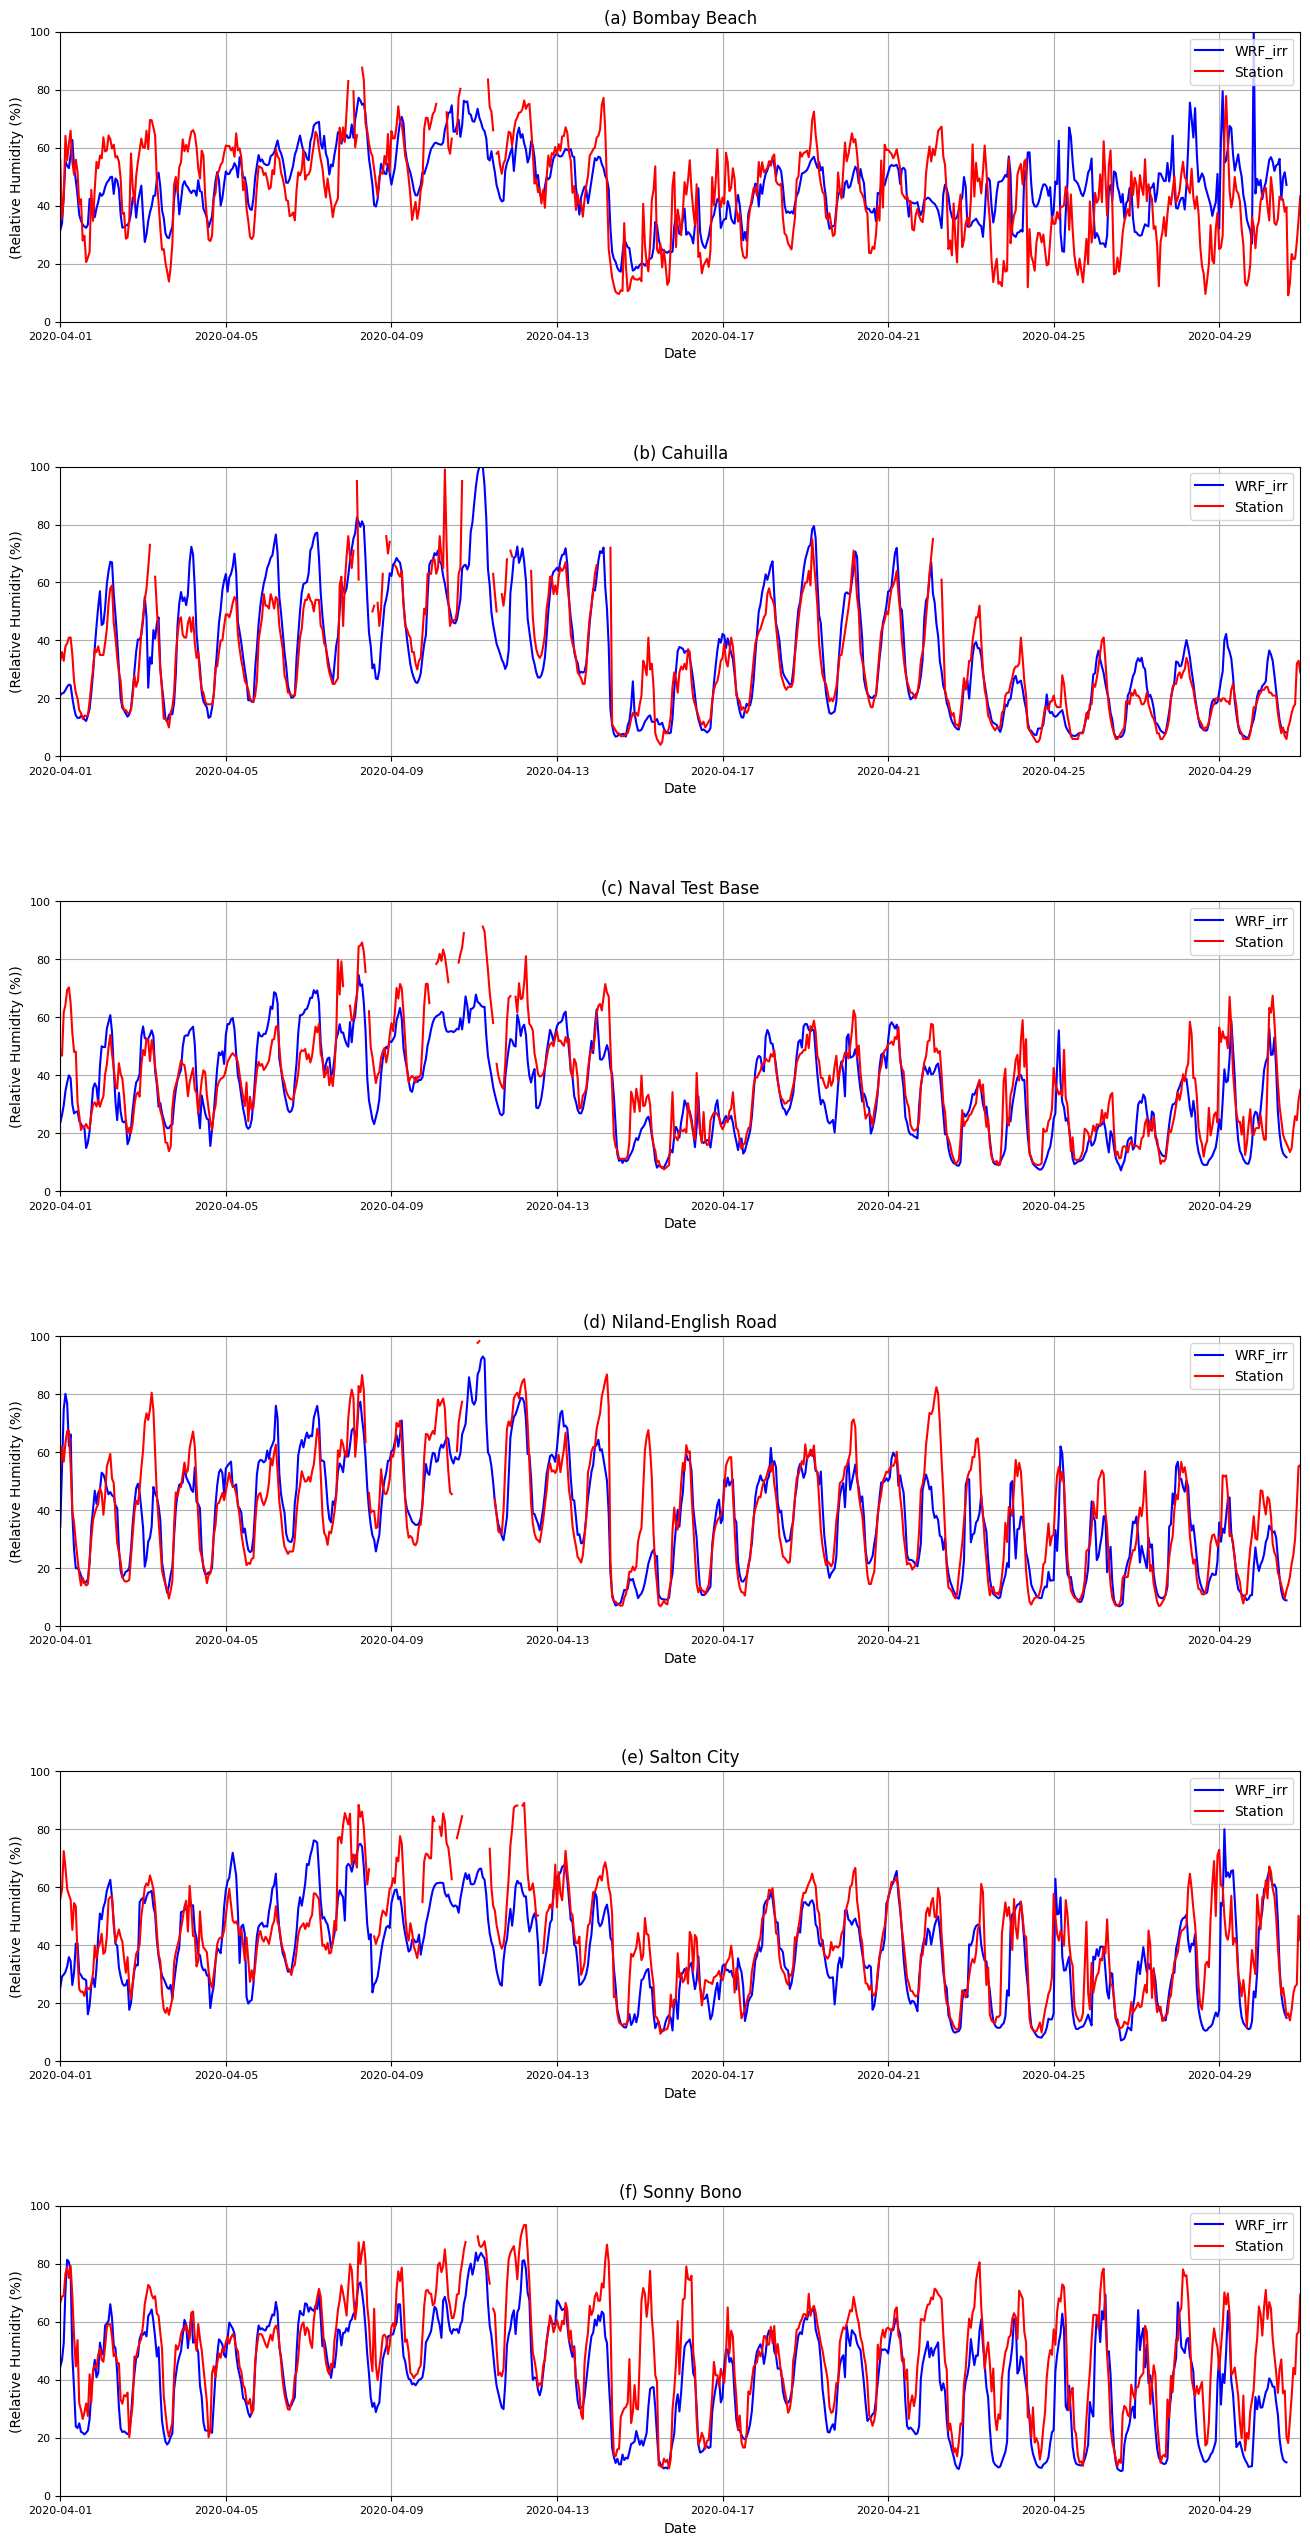

In [ ]:
# plot comparision figures for all stations

import matplotlib.pyplot as plt
import numpy as np
# Select rows between April 1 and April 30, 2020
start_date = '2020-04-01'
end_date = '2020-04-30'

num_steps = 720
start_date = np.datetime64('2020-04-01 00:00')
end_date = np.datetime64('2020-04-30 23:00')
step_size = np.timedelta64(1, 'h')

dates = np.arange(start_date, end_date + step_size, step_size)


fig, axs = plt.subplots(6, 1, figsize=(16, 32))
plt.subplots_adjust(hspace=0.5)

# Extract station names for plotting

station_names = list(unique_stations.name)
print(station_names)

del station_names[1] # delete Buttercup
del station_names[6] # delete Squaw lake
print(station_names)



for i, ax in enumerate(axs):
    ax.plot(dates[:], np.ma.masked_invalid(closest_data_fine_new[i, :]), label='WRF_irr', marker='', linestyle='-', color='blue')
    #ax.plot(dates[:], np.ma.masked_invalid(closest_data_sensor_new[i, :]), label='WRF_new', marker='', linestyle='-', color='green')
    ax.plot(dates[:], np.ma.masked_invalid(hourly_resampled_data_stns_array[i, :]), label='Station', marker='', linestyle='-', color='red')

    ax.set_title(f'({chr(ord("a") + i)}) {station_names[i]}')
    ax.set_xlabel('Date')
    ax.set_xlim([start_date, end_date])
    ax.tick_params(axis='x', labelrotation=0)
    ax.set_ylabel('(Relative Humidity (%))')
    ax.tick_params(axis='both', labelsize=8)
    ax.grid(True)
    ax.legend(loc='upper right')
    ax.set_ylim(0, 100)

#plt.savefig('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/Figures/timeseries_model_station_hum_irr.png', bbox_inches='tight', dpi=400)

plt.show()


['Bombay Beach', 'Buttercup', 'Cahuilla', 'Naval Test Base', 'Niland-English Road', 'Salton City', 'Sonny Bono', 'Squaw Lake']
['Bombay Beach', 'Cahuilla', 'Naval Test Base', 'Niland-English Road', 'Salton City', 'Sonny Bono']


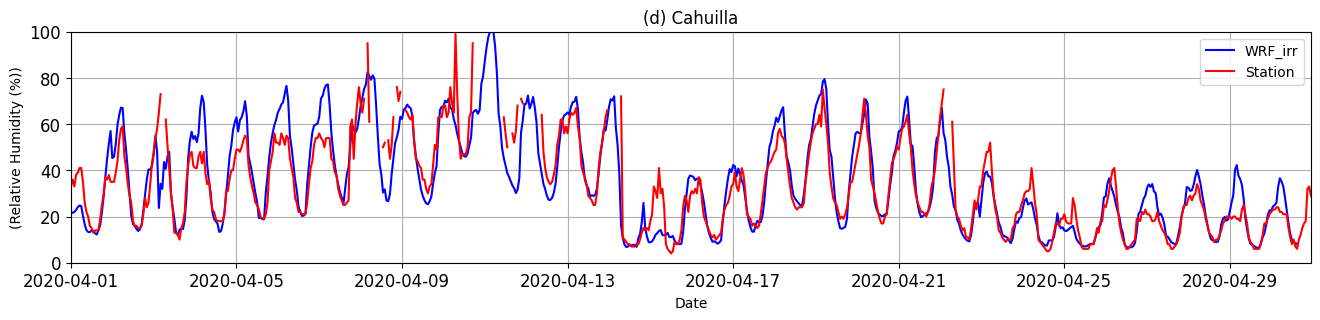

In [ ]:
# plot only Cahuilla

import matplotlib.pyplot as plt
import numpy as np
# Select rows between April 1 and April 30, 2020
start_date = '2020-04-01'
end_date = '2020-04-30'

num_steps = 720
start_date = np.datetime64('2020-04-01 00:00')
end_date = np.datetime64('2020-04-30 23:00')
step_size = np.timedelta64(1, 'h')

dates = np.arange(start_date, end_date + step_size, step_size)


fig, ax1 = plt.subplots(1, 1, figsize=(16, 3))
plt.subplots_adjust(hspace=0.5)

# Extract station names for plotting

station_names = list(unique_stations.name)
print(station_names)

del station_names[1] # delete Buttercup
del station_names[6] # delete Squaw lake
print(station_names)



ax1.plot(dates[:], np.ma.masked_invalid(closest_data_fine_new[1, :]), label='WRF_irr', marker='', linestyle='-', color='blue')
    #ax.plot(dates[:], np.ma.masked_invalid(closest_data_sensor_new[i, :]), label='WRF_new', marker='', linestyle='-', color='green')
ax1.plot(dates[:], np.ma.masked_invalid(hourly_resampled_data_stns_array[1, :]), label='Station', marker='', linestyle='-', color='red')

ax1.set_title('(d) Cahuilla')
ax1.set_xlabel('Date')
ax1.set_xlim([start_date, end_date])
ax1.tick_params(axis='x', labelrotation=0)
ax1.set_ylabel('(Relative Humidity (%))')
ax1.tick_params(axis='both', labelsize=12)
ax1.grid(True)
ax1.legend(loc='upper right')
ax1.set_ylim(0, 100)

#plt.savefig('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/Figures/timeseries_model_station_hum_irr.png', bbox_inches='tight', dpi=400)

plt.show()


In [ ]:
# Calculate pearson correlation using scipy

import numpy as np
from scipy import stats

# Lists to store results
all_model_fine_stn_r = []
all_model_fine_stn_p = []

for j in range(0, 6):
    valid_indices = ~np.isnan(closest_data_fine_new[j, :]) & ~np.isnan(hourly_resampled_data_stns_array[j, :])
    model_fine_stn_r, model_fine_stn_p = stats.pearsonr(closest_data_fine_new[j, valid_indices], hourly_resampled_data_stns_array[j, valid_indices])

    # Save results to lists
    all_model_fine_stn_r.append(model_fine_stn_r)
    all_model_fine_stn_p.append(model_fine_stn_p)

all_model_sensor_stn_r = []
all_model_sensor_stn_p = []

for j in range(0, 6):
    valid_indices = ~np.isnan(closest_data_sensor_new[j, :]) & ~np.isnan(hourly_resampled_data_stns_array[j, :])
    model_sensor_stn_r, model_sensor_stn_p = stats.pearsonr(closest_data_sensor_new[j, valid_indices], hourly_resampled_data_stns_array[j, valid_indices])

    # Save results to lists
    all_model_sensor_stn_r.append(model_sensor_stn_r)
    all_model_sensor_stn_p.append(model_sensor_stn_p)

all_model_sensor_stn_r

[0.5545689260911807,
 0.8962401915500128,
 0.8208896590035525,
 0.7779030433549146,
 0.7815902274183115,
 0.7326345760544133]

In [ ]:
# Calculate RMSE

import numpy as np
from sklearn.metrics import mean_squared_error

# RMSE is the standard deviation of the residuals

residuals_fine_stn = (closest_data_fine_new - hourly_resampled_data_stns_array)
rmse_fine_stn = np.nanstd(residuals_fine_stn, axis=1)
print(rmse_fine_stn.shape)

residuals_sensor_stn = (closest_data_sensor_new - hourly_resampled_data_stns_array)
rmse_sensor_stn = np.nanstd(residuals_sensor_stn, axis=1)
print(rmse_sensor_stn.shape)
rmse_sensor_stn


(6,)
(6,)


array([13.55886324,  8.35340712, 10.04771156, 12.79945422, 11.35071863,
       13.14063822])

In [ ]:
# create a new dataframe by putting together all Rho and RMSE data against stations

corr_rmse_stations = pd.DataFrame({"Rho:WRF_irr": all_model_fine_stn_r, 'Rho:WRF_new': all_model_sensor_stn_r, 'P-value:WRF_irr': all_model_fine_stn_p, 'P-value:WRF_new': all_model_sensor_stn_p, 'RMSE:WRF_irr': rmse_fine_stn, 'RMSE:WRF_new': rmse_sensor_stn}, index=station_names)
corr_rmse_stations.index.name = 'Station'
corr_rmse_stations

,Rho:WRF_irr,Rho:WRF_new,P-value:WRF_irr,P-value:WRF_new,RMSE:WRF_irr,RMSE:WRF_new
Station,,,,,,
Bombay Beach,0.532683,0.554569,1.542114e-51,1.420471e-56,13.928309,13.558863
Cahuilla,0.887595,0.896240,5.019004e-223,8.857671e-234,9.075763,8.353407
Naval Test Base,0.826295,0.820890,6.169063e-173,8.134212e-169,9.908594,10.047712
Niland-English Road,0.825790,0.777903,2.740592e-174,9.169229e-142,11.429163,12.799454
Salton City,0.776767,0.781590,1.099891e-139,1.559255e-142,11.521516,11.350719
Sonny Bono,0.826631,0.732635,1.069712e-177,1.399219e-119,10.602705,13.140638
